y = ax + b
1. 선형 : x,y 규칙적으로 생긴 선
2. 비선형 : 그래프의 굴곡이 있는것이며 선에 하나생기면 미분이다.
3. Machine Learning 그래프 종류
 - NN : 최근점 이웃
 - Tree 3조 :
 - 인공신경망(선형) : 

4. Y(Target) = aX(Feature) + b
 - y,x를 반복문으로 사용하여 값을 에측한다.
 - 정답이 아닌 예측값이다.
 - Feature는 여러가지 데이터 타입이 될 수 있다. ex)문자열,숫자 등..

# 회귀분석(Regression)
- 데이터를 이용하여 함수식 (Y=aX+b)를 구한다.
- 기울기(DL:Weight) 와 절편(DL:Bias)을 DataSet으로 최적값을 구한다. (정답과 오차율 차이가 제일 적은것으로 선택 --> 인공신경망으로 발전)
- 기울기와 절편으로 Y값을 예측할 수 있다.


### 단순회귀 분석 : Y=aX+b

In [1]:
regression <- read.csv("../Data/regression.csv")
head(regression)
tail(regression)

癤풹ge,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,癤풹ge,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [2]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ 癤풹ge: Factor w/ 31 levels "0~3Months","10Year",..: 1 16 24 30 4 15 19 21 23 26 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [3]:
# 기본 통계량 확인
summary(regression)

         癤풹ge       Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12~18Months: 1   Mean   :135.8   Mean   :42.62  
 12Year     : 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

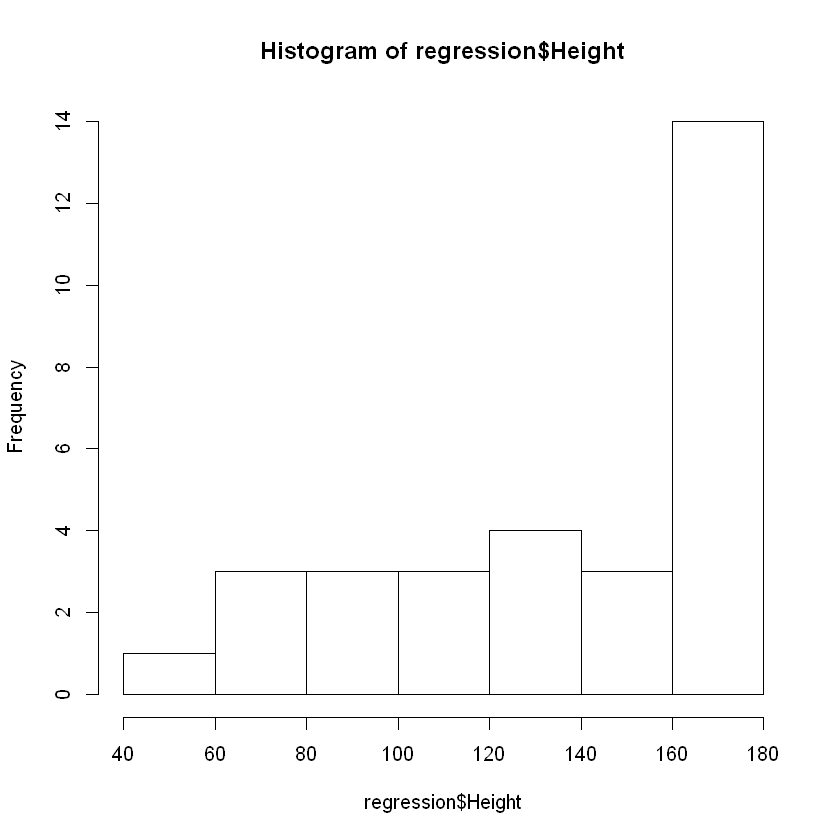

In [4]:
hist(regression$Height)

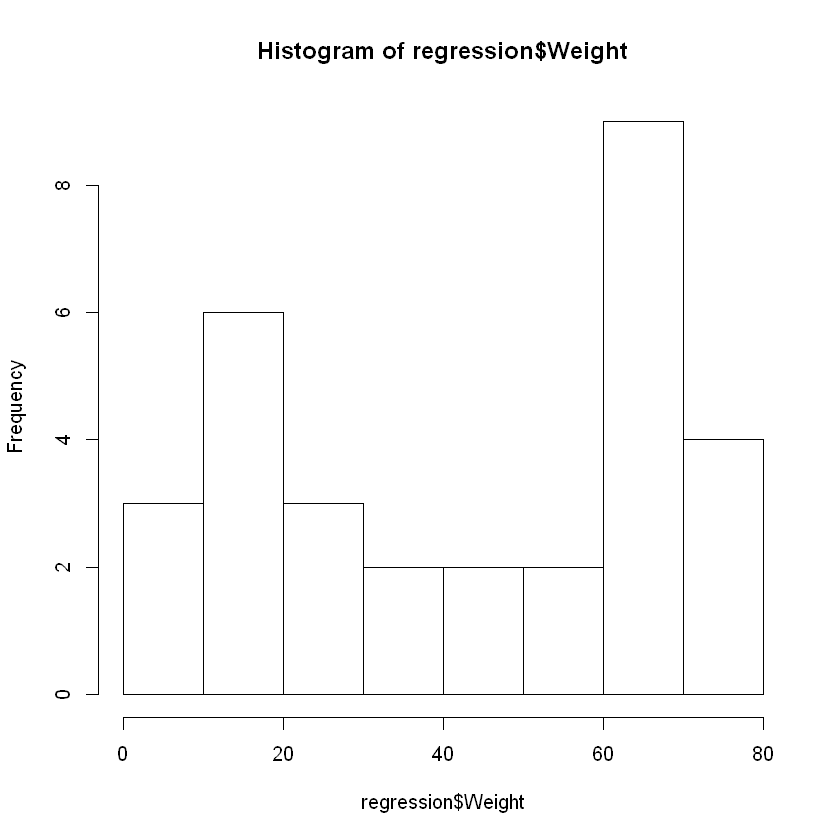

In [5]:
hist(regression$Weight)

In [6]:
cor(regression$Height, regression$Weight)

[1] 0.9672103

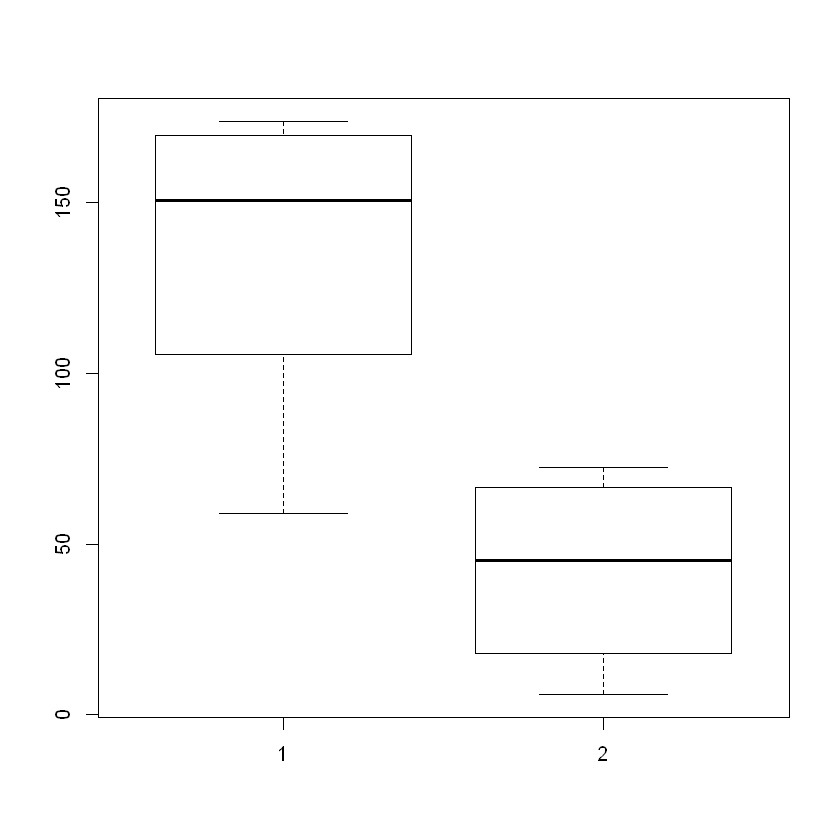

In [7]:
boxplot(regression$Height, regression$Weight)

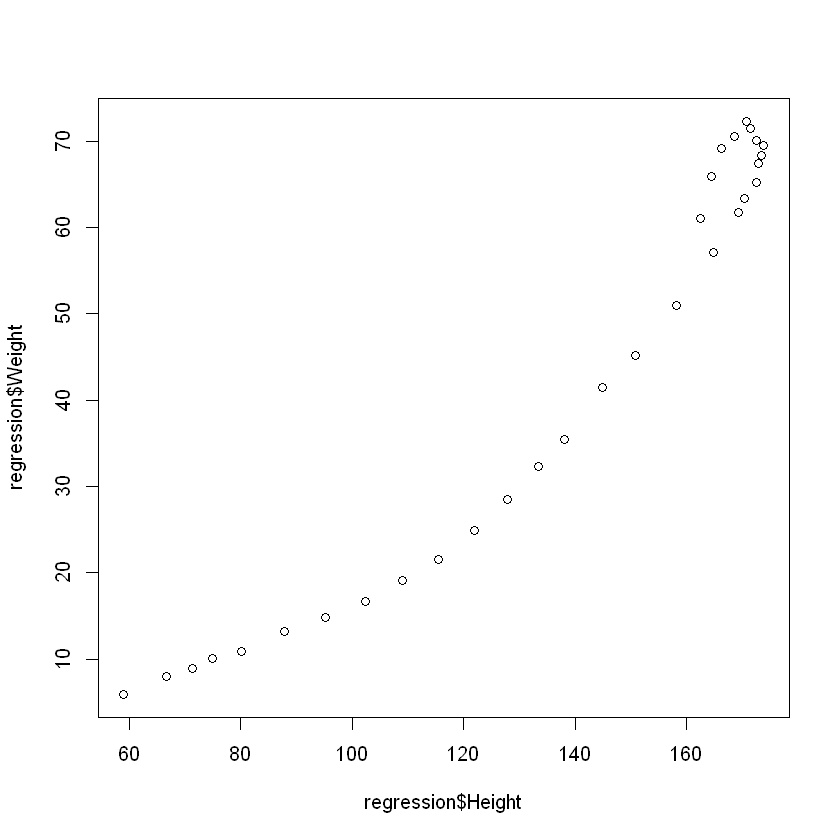

In [8]:
plot(regression$Height, regression$Weight) 

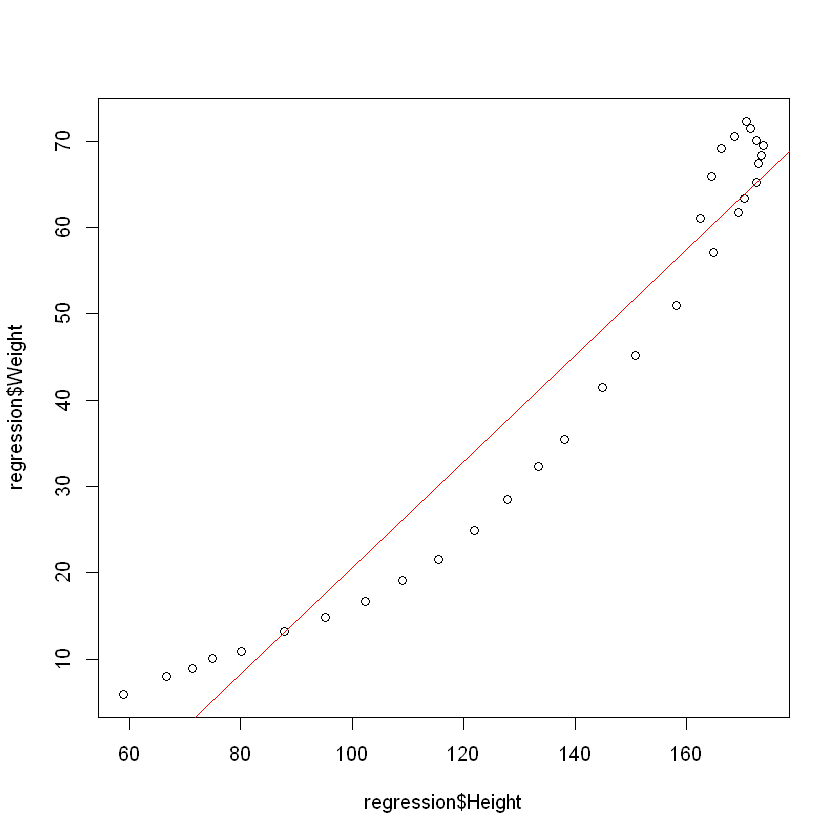

In [9]:
plot(regression$Weight ~ regression$Height) 

# 회귀선 (중심선, 평균선)
r<-lm(regression$Weight ~ regression$Height) # 이 식으로 통해 a,b값을 찾았다.
abline(r,col="red") #아래 선으로 통해 키와 몸무게를 예측할 수 있다.

In [10]:
# 분석결과 

summary(r)   #defult


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


- p-value: < 2.2e-16 < 0.05 
- Adjusted R-squared:  0.9333 <-- 예측력 0.9333%의 정확도가 있다.
- Residual standard error: 6.355 <-- 표준오차 

- Y=aX+b 

b의 값이 (Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***  이다. <br>
자유도 : Residual standard error: 6.355 on 29 degrees of freedom  <br>

In [11]:
# 회귀식
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [12]:
# 키가 170인 사람의 몸무게
0.6147 * 170 + (-40.8659) #이렇게 쓰면 안됨 표준오차 적용해야한다.

#표준 오차를 적용한 키가 170인 사람의 몸무게
cat(0.6147 * 170 + (-40.8659)-6.355,"~",0.6147 * 170 + (-40.8659)+6.355)

[1] 63.6331

57.2781 ~ 69.9881

---
# IQ

In [21]:
iq <- read.csv("../Data/IQ.csv", fileEncoding="utf-8")
head(iq)
tail(iq)


이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
5,E,65,105,0,4,4
6,F,80,123,3,1,1
7,G,83,132,3,4,1
8,H,70,115,1,1,3
9,I,87,128,4,0,0
10,J,79,131,2,2,3


In [14]:
# IQ가 126인 사람의 성적을 예측해 보시오.

In [22]:
str(iq)

'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


In [23]:
summary(iq)

      이름        성적            IQ        다니는.학원수  게임하는.시간
 A      :1   Min.   :65.0   Min.   :105.0   Min.   :0.00   Min.   :0.0  
 B      :1   1st Qu.:75.5   1st Qu.:120.8   1st Qu.:1.00   1st Qu.:1.0  
 C      :1   Median :79.5   Median :126.5   Median :2.00   Median :1.5  
 D      :1   Mean   :78.9   Mean   :125.4   Mean   :1.90   Mean   :1.9  
 E      :1   3rd Qu.:83.0   3rd Qu.:131.8   3rd Qu.:2.75   3rd Qu.:3.0  
 F      :1   Max.   :90.0   Max.   :140.0   Max.   :4.00   Max.   :4.0  
 (Other):4                                                              
  TV시청.시간 
 Min.   :0.0  
 1st Qu.:1.0  
 Median :2.5  
 Mean   :2.1  
 3rd Qu.:3.0  
 Max.   :4.0  
              

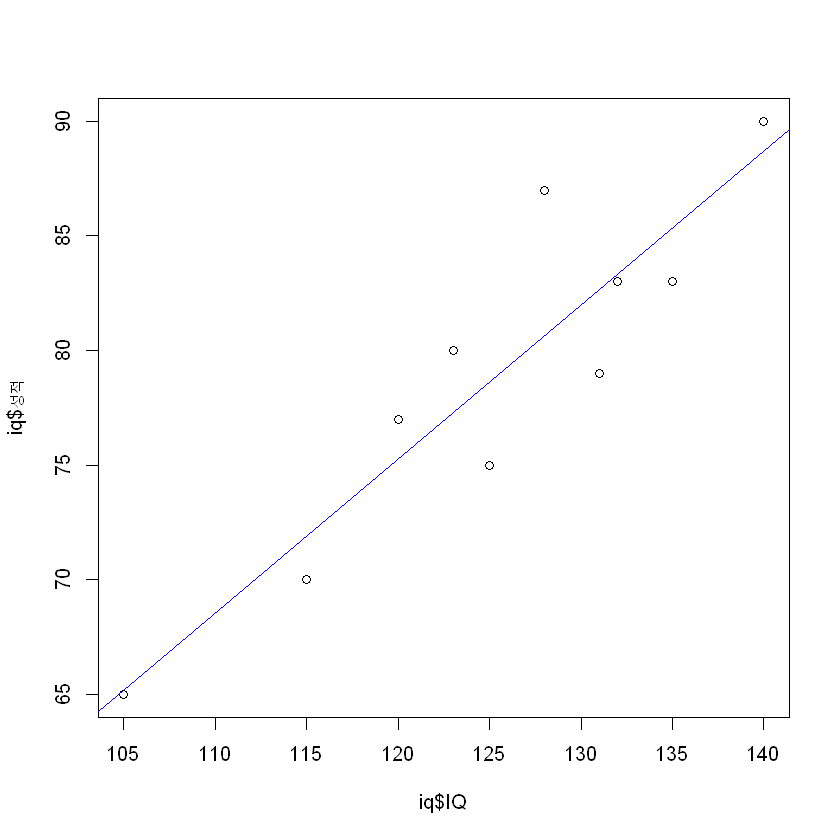

In [24]:
options(warn = -1)
#par(family="AppleGothic")
plot(iq$IQ,iq$성적)
i<-lm(iq$성적~iq$IQ)
abline(i,col="blue")

In [25]:
summary(i)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


- p-value: 0.0002547 < 0.05 대립가설 x
- Adjusted R-squared:  0.8071
- Residual standard error: 3.322 on 8 degrees of freedom

In [26]:
i


Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [27]:
 0.6714  * 126 + (-5.2918)  

[1] 79.3046

In [28]:
cat( 0.6714  * 126 -3.322,"~",0.6714  * 126  +3.322)

81.2744 ~ 87.9184

In [29]:
# 성적과 가장 관련이 깊은 항목은?
cor(iq[,-1])

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


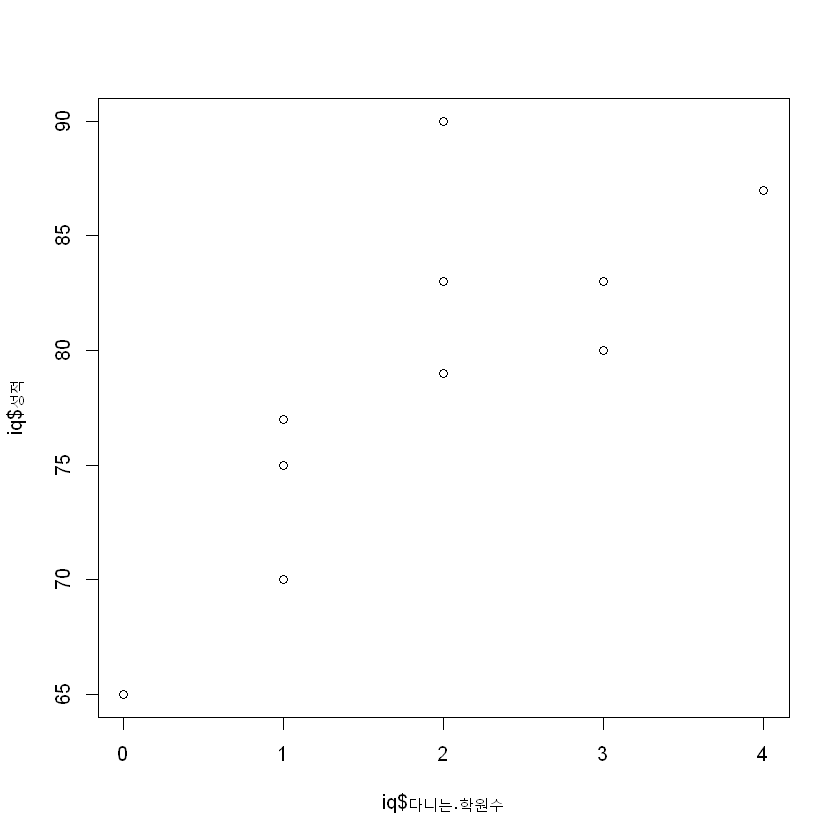

In [30]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?    y= 학원수, x = 성적
options(warn = -1)
par(family="AppleGothic")
plot(iq$다니는.학원수,iq$성적)
a<-lm(iq$다니는.학원수~iq$성적)


In [31]:
summary(a)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


- p-value: 0.007264
- Adjusted R-squared:  0.5666 
- Residual standard error: 4.98 on 8 degrees of freedom

In [32]:
a


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
    -7.8916       0.1241  


In [33]:
0.1241 * 90 + (-7.8916)

[1] 3.2774

In [34]:
cat(0.1241 * 90 + (-7.8916)-4.98,"~",0.1241 * 90 + (-7.8916)+4.98)

-1.7026 ~ 8.2574

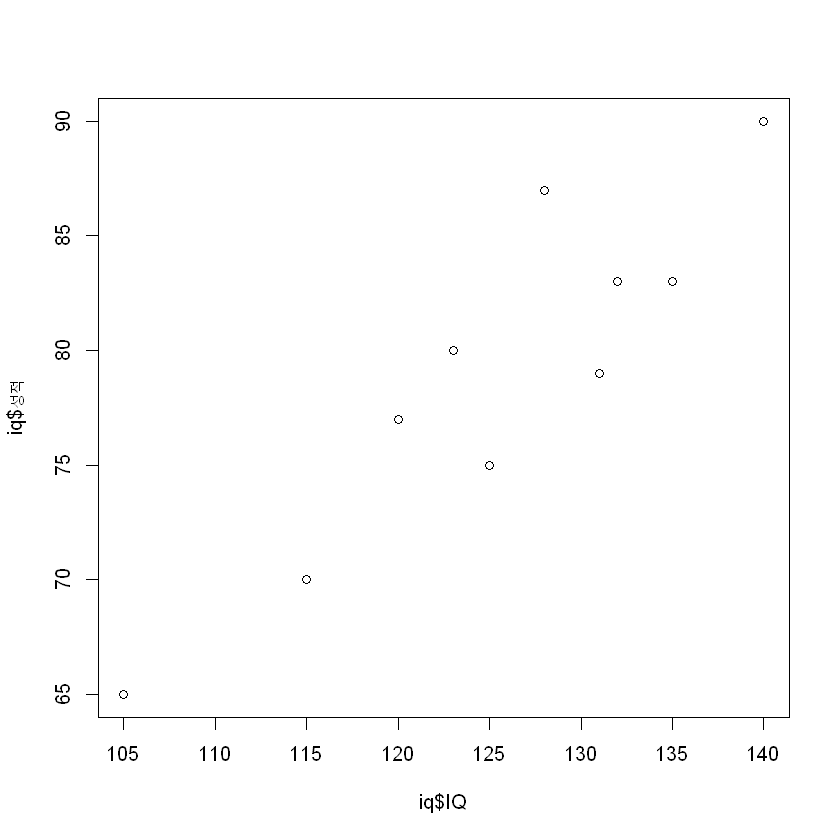

In [35]:
# 성적이 85점 이라면 IQ는 얼마?
options(warn = -1)
par(family="AppleGothic")
plot(iq$IQ,iq$성적)
b<-lm(iq$IQ~iq$성적)
abline(b,col="yellow")

In [36]:
summary(b)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


- p-value: 0.0002547
- Adjusted R-squared:  0.8071
- Residual standard error: 4.504 on 8 degrees of freedom

In [37]:
b


Call:
lm(formula = iq$IQ ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
     28.035        1.234  


In [38]:
1.234 * 85 + 28.035  # ax+b 

[1] 132.925

In [42]:
cat(1.234 * 85 +28 -4.504,"~",1.234 * 85+28 +4.504) # ax+b-r <= y^ <= ax+b+r    r:오차

128.386 ~ 137.394

---
## 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 예축하는 방법

## attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개부서 (무작위) 약 35명을 대상으로 한 설문지 데이터
- 각 수치는 각 부서의 7개 질문에 대한 점수를 나타낸다.

In [40]:
help(attitude)

In [41]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


In [ ]:
str(attitude)

In [ ]:
plot(attitude)

In [ ]:
# 회귀 분석 
#lm이 ax+b를 만드는함수 
lm(rating ~ complaints + privileges + learning + raises + critical + advance, data =attitude)


In [ ]:
# 회귀분석 .은 앞에 타겟 컬럼을 빼고 다 불러오겠다는 의미
model<-lm(rating ~., data =attitude)

rating = 0.61319 * complaints  + -0.07305 * privileges +.....+10.78708 

In [ ]:
# Model 검토
summary(model)

> Adjusted R-squared:  0.6628 

In [ ]:
cor(attitude)

In [ ]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거

reduced <- step(model,direction = "backward") # 필요없는거 제거하는 방법 맨마지막이 필요하다.

In [ ]:
summary(reduced)

> Adjusted R-squared:  0.6864  # 필요없는 것을 제거했더니 예측력이 높아졌다.

In [ ]:
reduced

---
# iris에 대한 다중 회귀 분석

In [ ]:
head(iris)

In [ ]:
str(iris)

In [ ]:
plot(iris)

In [ ]:
airis<-lm(as.numeric(Species) ~., data =iris)

In [ ]:
summary(airis)

>> Adjusted R-squared:  0.9285

In [ ]:
reiris <- step(airis,direction = "backward")

In [ ]:
summary(reiris)

>> Adjusted R-squared:  0.9287